# Introduction

This year, as in 2017, 2018, 2019, 2020, and 2021, we set out to conduct an industry-wide survey that presents a truly comprehensive view of the state of data science and machine learning. The survey was live from 09/16/2022 to 10/16/2022, and after cleaning the data we finished with 23,997 responses!There's a lot to explore here. The results include raw numbers about who is working with data, what’s happening with machine learning in different industries, and the best ways for new data scientists to break into the field. We've published all of the data rather than only the aggregated survey results, which makes it an unusual example of a survey dataset, as it allows analysts to investigate the data on their own.

# Importing libraries and loading data

In [1]:
import pandas as pd 
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [6]:
df = pd.read_csv('kaggle_survey_2022_responses.csv')

In [3]:
# new_header = df.iloc[0] #grab the first row for the header
# df = df[1:] #take the data less the header row
# df.columns = new_header #set the header row as the df header

In [7]:
df.head()

Duration (in seconds) What is your age (# years)?  \
0                    121                       30-34   
1                    462                       30-34   
2                    293                       18-21   
3                    851                       55-59   
4                    232                       45-49   

  What is your gender? - Selected Choice  \
0                                    Man   
1                                    Man   
2                                    Man   
3                                    Man   
4                                    Man   

  In which country do you currently reside?  \
0                                     India   
1                                   Algeria   
2                                     Egypt   
3                                    France   
4                                     India   

  Are you currently a student? (high school, university, or graduate)  \
0                                                 No                    
1                                                 No                    
2                                                Yes                    
3                                                 No                    
4                                                Yes                    

  On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera  \
0                                              Other                                                                          
1  University Courses (resulting in a university ...                                                                          
2                                           Coursera                                                                          
3                                           Coursera                                                                          
4                                              Other                                                                          

  What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - University courses  \
0                                                NaN                                                                                                                         
1                                 University courses                                                                                                                         
2                Online courses (Coursera, EdX, etc)                                                                                                                         
3                Online courses (Coursera, EdX, etc)                                                                                                                         
4                                 University courses                                                                                                                         

  What is the highest level of formal education that you have attained or plan to attain within the next 2 years?  \
0                                                NaN                                                                
1                                     Master? degree                                                                
2                                   Bachelor? degree                                                                
3  Some college/university study without earning ...                                                                
4                                   Bachelor? degree                                                                

  Have you ever published any academic research (papers, preprints, conference proceedings, etc)?  \
0                                                NaN               

# Explanatory data analysis

## Cleaning and modifing part

In [8]:
df.columns

Index(['Duration (in seconds)', 'What is your age (# years)?',
       'What is your gender? - Selected Choice',
       'In which country do you currently reside?',
       'Are you currently a student? (high school, university, or graduate)',
       'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera',
       'What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - University courses',
       'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
       'Have you ever published any academic research (papers, preprints, conference proceedings, etc)?',
       'Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)',
       'For how many years have you been writing code and/

In [17]:
column = {'What is your age (# years)?':'Age',
         'What is your gender? - Selected Choice':'Gender',
         'In which country do you currently reside?':'Country',
         'Are you currently a student? (high school, university, or graduate)':'student',
         'On which platforms have you begun or completed data science courses? (Select all that apply) - Selected Choice - Coursera':'platforms',
          'What products or platforms did you find to be most helpful when you first started studying data science?  (Select all that apply) - Selected Choice - University courses':'most_helpful_platform',
          'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?':'education',
       'Have you ever published any academic research (papers, preprints, conference proceedings, etc)?':'puplishes',
       'Did your research make use of machine learning? - Yes, the research made advances related to some novel machine learning method (theoretical research)':'using_machine_learning',
       'For how many years have you been writing code and/or programming?':'coding_experience',
       'What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Python':'programming_languages',
       "Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all that apply) - Selected Choice - JupyterLab":'IDE',
       'Do you use any of the following hosted notebook products?  (Select all that apply) - Selected Choice -  Kaggle Notebooks':'notebook_products',
       'Do you use any of the following data visualization libraries on a regular basis?  (Select all that apply) - Selected Choice -  Matplotlib':'data_viz_lib',
       'For how many years have you used machine learning methods?':'machine_learning_methods',
       'Which of the following machine learning frameworks do you use on a regular basis? (Select all that apply) - Selected Choice -   Scikit-learn':'ML_framework',
       'Which of the following ML algorithms do you use on a regular basis? (Select all that apply): - Selected Choice - Linear or Logistic Regression':'ML_algorithm',
       'Which categories of computer vision methods do you use on a regular basis?  (Select all that apply) - Selected Choice - General purpose image/video tools (PIL, cv2, skimage, etc)':'computer_vision_method',
       'Which of the following natural language processing (NLP) methods do you use on a regular basis?  (Select all that apply) - Selected Choice - Word embeddings/vectors (GLoVe, fastText, word2vec)':'NLP_methods',
        'Do you download pre-trained model weights from any of the following services? (Select all that apply) - Selected Choice -   TensorFlow Hub':'pretrained_model_weight',
       'Which of the following ML model hubs/repositories do you use most often? - Selected Choice':'ML_repo',
       'Select the title most similar to your current role (or most recent title if retired): - Selected Choice':'job_title',
       'In what industry is your current employer/contract (or your most recent employer if retired)? - Selected Choice':'job_industry',
       'What is the size of the company where you are employed?':'size_of_company',
       'Approximately how many individuals are responsible for data science workloads at your place of business?':'no.of_data_scientist',
       'Does your current employer incorporate machine learning methods into their business?':'using_ML_in_business',
       'Select any activities that make up an important part of your role at work: (Select all that apply) - Analyze and understand data to influence product or business decisions':'activities_at_work',
       'What is your current yearly compensation (approximate $USD)?':'yearly_compensation',
       'Approximately how much money have you spent on machine learning and/or cloud computing services at home or at work in the past 5 years (approximate $USD)?\n (approximate $USD)?':'money_spent_on_ML_or_cloud_computing',
       'Which of the following cloud computing platforms do you use? (Select all that apply) - Selected Choice -  Amazon Web Services (AWS)':'cloud_computing_platform',
       'Of the cloud platforms that you are familiar with, which has the best developer experience (most enjoyable to use)? - Selected Choice':'most_enjoyable_cloud_platform',
       'Do you use any of the following cloud computing products? (Select all that apply) - Selected Choice -  Amazon Elastic Compute Cloud (EC2)':'cloud_computing_product',
       'Do you use any of the following data storage products? (Select all that apply) - Selected Choice - Microsoft Azure Blob Storage':'data_storage_product',
       'Do you use any of the following data products (relational databases, data warehouses, data lakes, or similar)? (Select all that apply) - Selected Choice - MySQL':'data_products',
       'Do you use any of the following business intelligence tools? (Select all that apply) - Selected Choice - Amazon QuickSight':'BI_tools',
       'Do you use any of the following managed machine learning products on a regular basis? (Select all that apply) - Selected Choice -  Amazon SageMaker':'ML_products',
       'Do you use any of the following automated machine learning tools?  (Select all that apply) - Selected Choice -  Google Cloud AutoML':'auto_ML_tools',
       'Do you use any of the following products to serve your machine learning models?  (Select all that apply) - Selected Choice -  TensorFlow Extended (TFX)':'products_serve_in_ML_models',
       'Do you use any tools to help monitor your machine learning models and/or experiments? (Select all that apply) - Selected Choice -  Neptune.ai':'tools_monitor_ML_models',
       'Do you use any of the following responsible or ethical AI products in your machine learning practices?  (Select all that apply) - Selected Choice -  Google Responsible AI Toolkit (LIT, What-if, Fairness Indicator, etc)':'AI_products',
       'Do you use any of the following types of specialized hardware when training machine learning models?  (Select all that apply) - Selected Choice -  GPUs':'specialized_hardware',
       'Approximately how many times have you used a TPU (tensor processing unit)?':'times_of_using_TPU',
       'Who/what are your favorite media sources that report on data science topics? (Select all that apply) - Selected Choice - Twitter (data science influencers)':'fav_social_media_source'
         }

In [18]:
df.rename(columns=column,inplace=True)

Renaming columns to be easily called for analysis

In [19]:
df.head()

Duration (in seconds)    Age Gender  Country student  \
0                    121  30-34    Man    India      No   
1                    462  30-34    Man  Algeria      No   
2                    293  18-21    Man    Egypt     Yes   
3                    851  55-59    Man   France      No   
4                    232  45-49    Man    India     Yes   

                                           platforms  \
0                                              Other   
1  University Courses (resulting in a university ...   
2                                           Coursera   
3                                           Coursera   
4                                              Other   

                 most_helpful_platform  \
0                                  NaN   
1                   University courses   
2  Online courses (Coursera, EdX, etc)   
3  Online courses (Coursera, EdX, etc)   
4                   University courses   

                                           education puplishes  \
0                                                NaN       NaN   
1                                     Master? degree       Yes   
2                                   Bachelor? degree       NaN   
3  Some college/university study without earning ...       NaN   
4                                   Bachelor? degree       NaN   

  using_machine_learning  ... data_products BI_tools ML_products  \
0                    NaN  ...           NaN      NaN         NaN   
1                     No  ...           NaN      NaN         NaN   
2                    NaN  ...           NaN      NaN         NaN   
3                    NaN  ...      MongoDB      None   No / None   
4                    NaN  ...           NaN      NaN         NaN   

  auto_ML_tools products_serve_in_ML_models tools_monitor_ML_models  \
0           NaN                         NaN                     NaN   
1           NaN                         NaN                     NaN   
2           NaN                         NaN                     NaN   
3     No / None                ONNX Runtime                     NaN   
4           NaN                         NaN                     NaN   

  AI_products specialized_hardware times_of_using_TPU  \
0         NaN                  NaN                NaN   
1         NaN                  NaN                NaN   
2         NaN                  NaN                NaN   
3        None                 GPUs          2-5 times   
4         NaN                  NaN                NaN   

                             fav_social_media_source  
0                                                NaN  
1                                                NaN  
2                 Twitter (data science influencers)  
3                 Twitter (data science influencers)  
4  Blogs (Towards Data Science, Analytics Vidhya,...  

[5 rows x 44 columns]

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23997 entries, 0 to 23996
Data columns (total 44 columns):
 #   Column                                Non-Null Count  Dtype 
---  ------                                --------------  ----- 
 0   Duration (in seconds)                 23997 non-null  int64 
 1   Age                                   23997 non-null  object
 2   Gender                                23997 non-null  object
 3   Country                               23997 non-null  object
 4   student                               23997 non-null  object
 5   platforms                             23997 non-null  object
 6   most_helpful_platform                 23696 non-null  object
 7   education                             23398 non-null  object
 8   puplishes                             12361 non-null  object
 9   using_machine_learning                5223 non-null   object
 10  coding_experience                     23243 non-null  object
 11  programming_languages       

In [21]:
df.fillna('Not answered',inplace=True)

After looking and thinking about NAN values I decided to fill them with 'not answered'

In [22]:
df.head()

Duration (in seconds)    Age Gender  Country student  \
0                    121  30-34    Man    India      No   
1                    462  30-34    Man  Algeria      No   
2                    293  18-21    Man    Egypt     Yes   
3                    851  55-59    Man   France      No   
4                    232  45-49    Man    India     Yes   

                                           platforms  \
0                                              Other   
1  University Courses (resulting in a university ...   
2                                           Coursera   
3                                           Coursera   
4                                              Other   

                 most_helpful_platform  \
0                         Not answered   
1                   University courses   
2  Online courses (Coursera, EdX, etc)   
3  Online courses (Coursera, EdX, etc)   
4                   University courses   

                                           education     puplishes  \
0                                       Not answered  Not answered   
1                                     Master? degree           Yes   
2                                   Bachelor? degree  Not answered   
3  Some college/university study without earning ...  Not answered   
4                                   Bachelor? degree  Not answered   

  using_machine_learning  ... data_products      BI_tools   ML_products  \
0           Not answered  ...  Not answered  Not answered  Not answered   
1                     No  ...  Not answered  Not answered  Not answered   
2           Not answered  ...  Not answered  Not answered  Not answered   
3           Not answered  ...      MongoDB           None     No / None   
4           Not answered  ...  Not answered  Not answered  Not answered   

  auto_ML_tools products_serve_in_ML_models tools_monitor_ML_models  \
0  Not answered                Not answered            Not answered   
1  Not answered                Not answered            Not answered   
2  Not answered                Not answered            Not answered   
3     No / None                ONNX Runtime            Not answered   
4  Not answered                Not answered            Not answered   

    AI_products specialized_hardware times_of_using_TPU  \
0  Not answered         Not answered       Not answered   
1  Not answered         Not answered       Not answered   
2  Not answered         Not answered       Not answered   
3          None                 GPUs          2-5 times   
4  Not answered         Not answered       Not answered   

                             fav_social_media_source  
0                                       Not answered  
1                                       Not answered  
2                 Twitter (data science influencers)  
3                 Twitter (data science influencers)  
4  Blogs (Towards Data Science, Analytics Vidhya,...  

[5 rows x 44 columns]

In [23]:
df.Age.value_counts()

18-21    4559
25-29    4472
22-24    4283
30-34    2972
35-39    2353
40-44    1927
45-49    1253
50-54     914
55-59     611
60-69     526
70+       127
Name: Age, dtype: int64

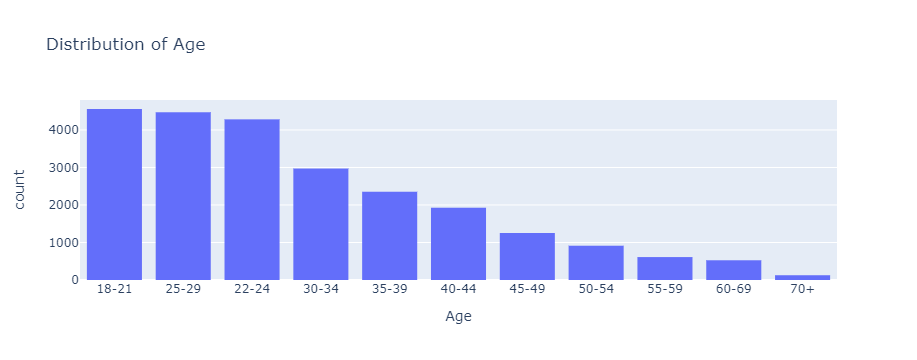

In [24]:
fig = px.histogram(df,x=df['Age'],title='Distribution of Age')
fig.update_xaxes(categoryorder='total descending')
fig.show()

The graph shows the distribution of Age in our data

In [25]:
df.Country.value_counts()

India                                                   8792
United States of America                                2920
Other                                                   1430
Brazil                                                   833
Nigeria                                                  731
Pakistan                                                 620
Japan                                                    556
China                                                    453
Egypt                                                    383
Mexico                                                   380
Indonesia                                                376
Turkey                                                   345
Russia                                                   324
South Korea                                              317
France                                                   262
United Kingdom of Great Britain and Northern Ireland     258
Spain                   

India and USA are the top two country in our data 

In [26]:
df.Gender.value_counts()

Man                        18266
Woman                       5286
Prefer not to say            334
Nonbinary                     78
Prefer to self-describe       33
Name: Gender, dtype: int64

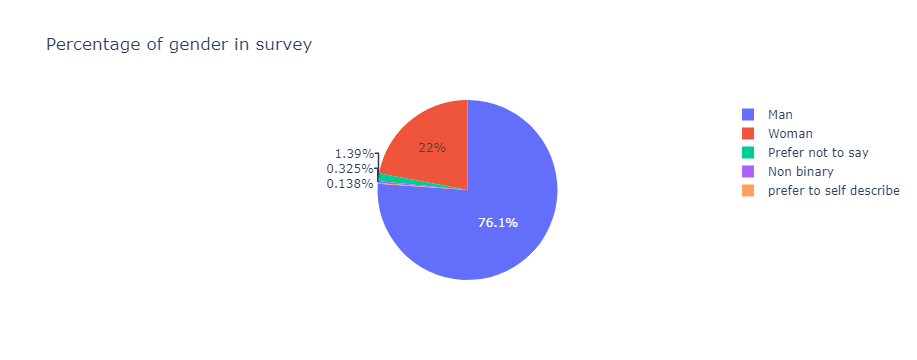

In [27]:
fig = px.pie(df,values=df['Gender'].value_counts(),names=['Man','Woman','Prefer not to say','Non binary','prefer to self describe'],title='Percentage of gender in survey')
# fig.update_xaxes(categoryorder='total descending')
fig.show()

we could see that males are the most frequent gender in our survey, our data is biased to male gender

In [28]:
df.student.value_counts()

No     12036
Yes    11961
Name: student, dtype: int64

In [29]:
df.student.replace({'No':0,'Yes':1},inplace=True)

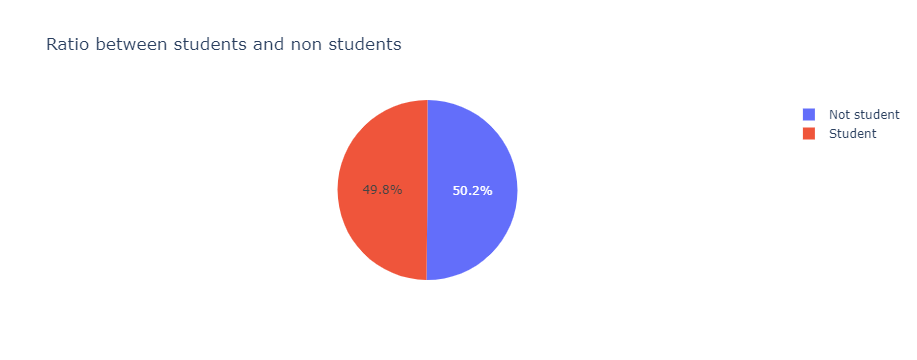

In [30]:
fig = px.pie(df,values=df['student'].value_counts(),names=['Not student','Student'],title='Ratio between students and non students')
fig.show()

We could see that 50% are Students and the other are graduates

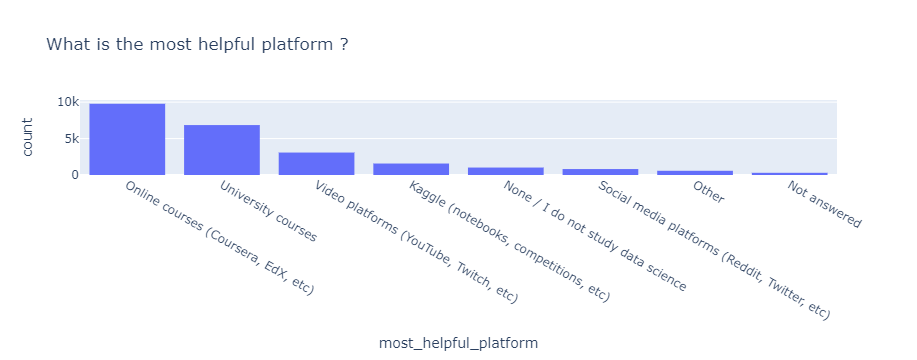

In [31]:
fig= px.histogram(df,x=df['most_helpful_platform'],title='What is the most helpful platform ?')
fig.update_xaxes(categoryorder='total descending')
fig.show()

Online courses are the most useful platform followed by University courses and Video platforms

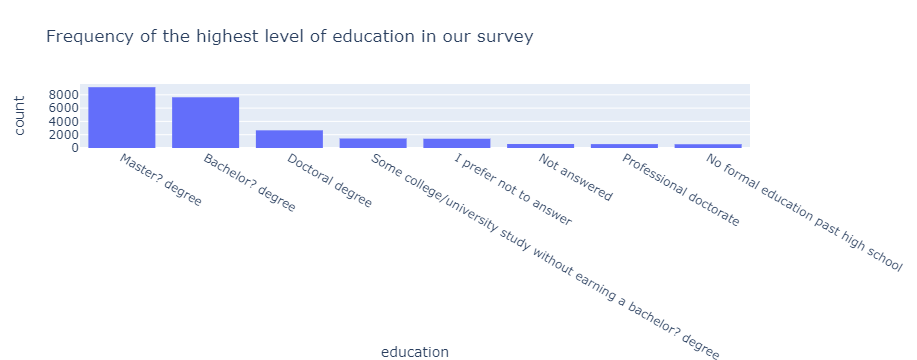

In [32]:
fig= px.histogram(df,x=df['education'],title='Frequency of the highest level of education in our survey ')
fig.update_xaxes(categoryorder='total descending')
fig.show()

Students who finished their Master degree or plan to attain it are the most surveyed followed by students in Bachelor degree

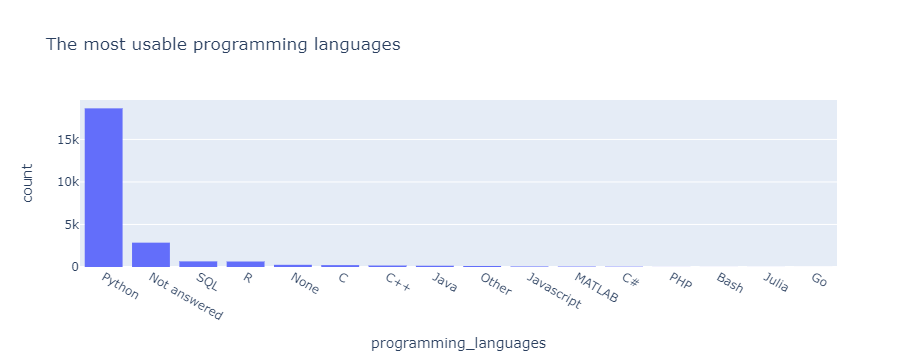

In [33]:
fig = px.histogram(df,x=df['programming_languages'],title='The most usable programming languages')
fig.update_xaxes(categoryorder='total descending')
fig.show()

Python is the most used programming language in our survey in data science

In [34]:
df.using_machine_learning.value_counts()

Not answered                                                                                            18774
No                                                                                                       1913
Yes, the research made use of machine learning as a tool (applied research)                              1761
Yes, the research made advances related to some novel machine learning method (theoretical research)     1549
Name: using_machine_learning, dtype: int64

In [35]:
df.using_machine_learning.replace({'Yes, the research made use of machine learning as a tool (applied research)':'yes','Yes, the research made advances related to some novel machine learning method (theoretical research)':'yes'},inplace=True)

I renamed the value of using_machine_learning column for easier analysis

In [36]:
df.using_machine_learning.value_counts()

Not answered    18774
yes              3310
No               1913
Name: using_machine_learning, dtype: int64

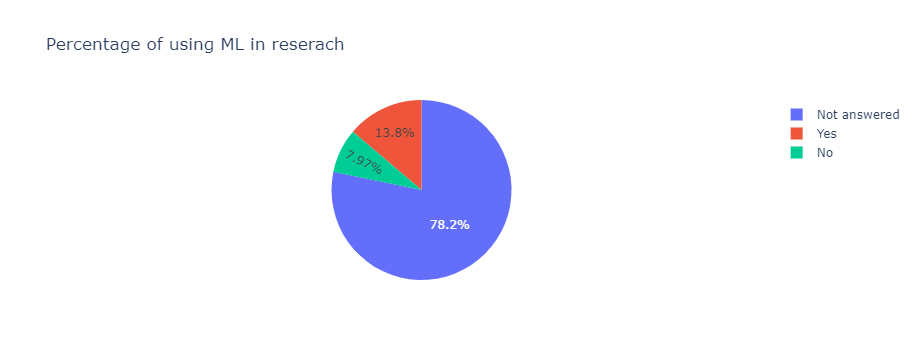

In [37]:
fig = px.pie(df,values=df['using_machine_learning'].value_counts(),names=['Not answered','Yes','No'],title='Percentage of using ML in reserach')
fig.show()

Students who uses ML in their research is more than people who do not use ML 

# Exploratory data analysis

We will conduct our analysis on male group who are students and uses ML in their master degree and are juniors in machine learning methods i.e(less than 1 year or 1-2 years of experience) try to deeply explore the impact, priorities, or concerns of a specific group of data science and machine learning practitioners

In [38]:
analysis_df = df.query("Gender == 'Man' & student == 1 & education == 'Master? degree' & using_machine_learning == 'yes' & machine_learning_methods == ['Under 1 year','1-2 years'] ")

In [39]:
analysis_df.head()

Duration (in seconds)    Age Gender   Country  student  \
86                    1067  25-29    Man  Ethiopia        1   
231                    432  22-24    Man     India        1   
266                    269  25-29    Man     India        1   
325                    274  25-29    Man   Germany        1   
387                    371  25-29    Man  Ethiopia        1   

                                             platforms most_helpful_platform  \
86                                Kaggle Learn Courses    University courses   
231  University Courses (resulting in a university ...    University courses   
266                                           Coursera    University courses   
325                                           Coursera    University courses   
387  University Courses (resulting in a university ...    University courses   

          education puplishes using_machine_learning  ... data_products  \
86   Master? degree       Yes                    yes  ...  Not answered   
231  Master? degree       Yes                    yes  ...  Not answered   
266  Master? degree       Yes                    yes  ...  Not answered   
325  Master? degree       Yes                    yes  ...  Not answered   
387  Master? degree       Yes                    yes  ...  Not answered   

         BI_tools   ML_products auto_ML_tools products_serve_in_ML_models  \
86   Not answered  Not answered  Not answered                Not answered   
231  Not answered  Not answered  Not answered                Not answered   
266  Not answered  Not answered  Not answered                Not answered   
325  Not answered  Not answered  Not answered                Not answered   
387  Not answered  Not answered  Not answered                Not answered   

    tools_monitor_ML_models   AI_products specialized_hardware  \
86             Not answered  Not answered         Not answered   
231            Not answered  Not answered         Not answered   
266            Not answered  Not answered         Not answered   
325            Not answered  Not answered         Not answered   
387            Not answered  Not answered         Not answered   

    times_of_using_TPU                            fav_social_media_source  
86        Not answered  Email newsletters (Data Elixir, O'Reilly Data ...  
231       Not answered                                       Not answered  
266       Not answered                                               None  
325       Not answered                                               None  
387       Not answered  Email newsletters (Data Elixir, O'Reilly Data ...  

[5 rows x 44 columns]

In [40]:
analysis_df.Age.value_counts()

22-24    91
25-29    59
18-21    37
30-34    17
35-39    14
40-44    12
45-49     5
50-54     3
55-59     1
Name: Age, dtype: int64

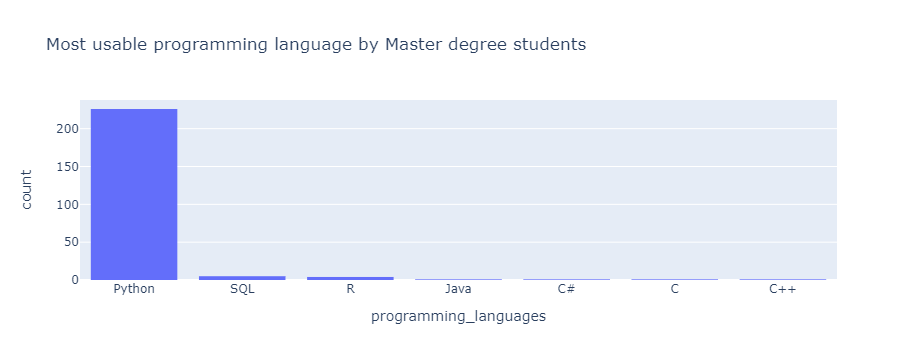

In [41]:
fig = px.histogram(analysis_df,x=analysis_df['programming_languages'],title='Most usable programming language by Master degree students')
fig.update_xaxes(categoryorder='total descending')
fig.show()

most of them uses Python as their main programming language

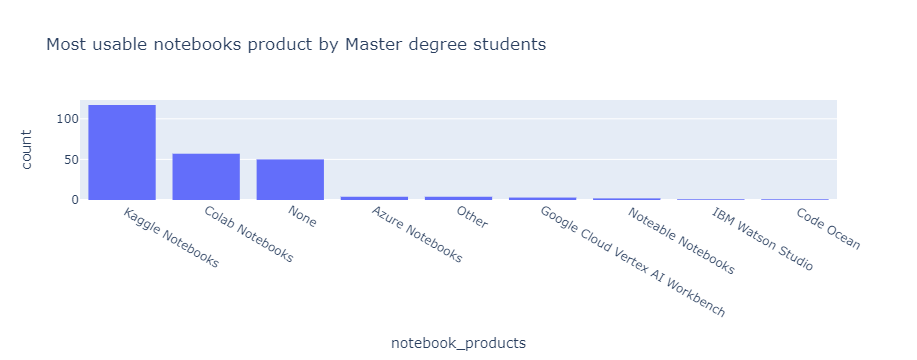

In [42]:
fig = px.histogram(analysis_df,x=analysis_df['notebook_products'],title='Most usable notebooks product by Master degree students')
fig.update_xaxes(categoryorder='total descending')
fig.show()

The most usable notebook products is Kaggle notebook followed by Colab Notebooks

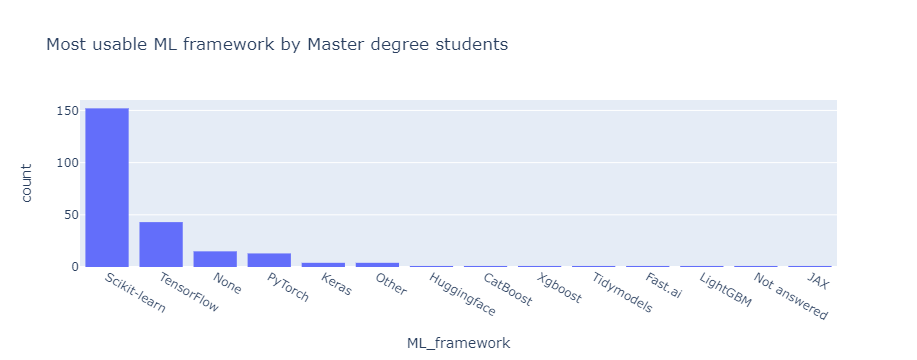

In [43]:
fig = px.histogram(analysis_df,x=analysis_df['ML_framework'],title='Most usable ML framework by Master degree students')
fig.update_xaxes(categoryorder='total descending')
fig.show()

Scikit learn is the most usable ML frame work followed by TensorFlow an PyTorch

In [44]:
analysis_df.ML_algorithm.value_counts()

Linear or Logistic Regression                          158
Decision Trees or Random Forests                        16
Dense Neural Networks (MLPs, etc)                       10
Convolutional Neural Networks                            9
Gradient Boosting Machines (xgboost, lightgbm, etc)      8
Not answered                                             8
Bayesian Approaches                                      7
None                                                     7
Other                                                    5
Recurrent Neural Networks                                5
Transformer Networks (BERT, gpt-3, etc)                  3
Generative Adversarial Networks                          2
Evolutionary Approaches                                  1
Name: ML_algorithm, dtype: int64

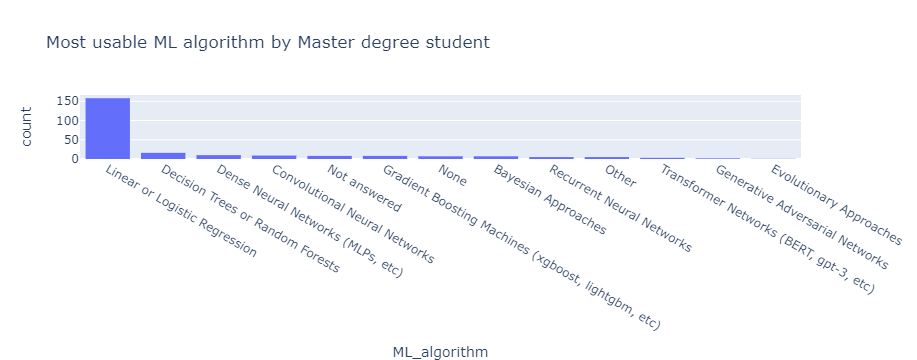

In [45]:
fig = px.histogram(analysis_df,x=analysis_df['ML_algorithm'],title='Most usable ML algorithm by Master degree student')
fig.update_xaxes(categoryorder='total descending')
fig.show()

Linear or logistic regression are the most usable algorithm followed by decision trees or random forests

In [46]:
analysis_df.ML_repo.value_counts()

Not answered                                  159
 Kaggle datasets                               41
  TensorFlow Hub                               16
 PyTorch Hub                                   11
 Huggingface Models                             6
 ONNX models                                    2
Other storage services (i.e. google drive)      2
 Timm                                           1
 Jumpstart                                      1
Name: ML_repo, dtype: int64

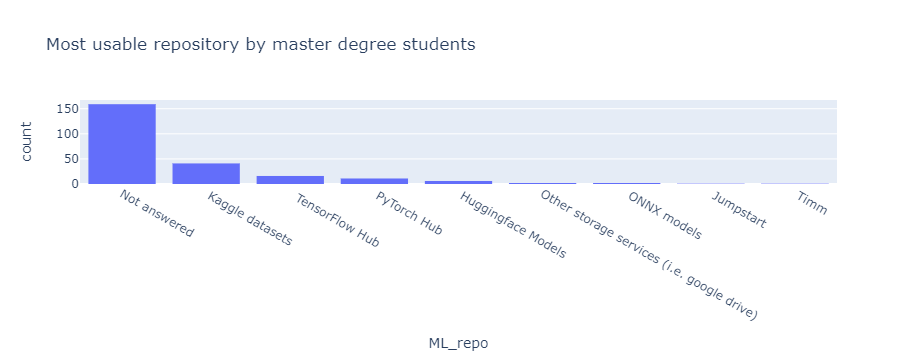

In [47]:
fig = px.histogram(analysis_df,x=analysis_df['ML_repo'],title='Most usable repository by master degree students')
fig.update_xaxes(categoryorder='total descending')
fig.show()

Kaggle datasets is the most usable ML repository

In [48]:
analysis_df.fav_social_media_source.value_counts()

Kaggle (notebooks, forums, etc)                                               81
Twitter (data science influencers)                                            40
Email newsletters (Data Elixir, O'Reilly Data & AI, etc)                      35
YouTube (Kaggle YouTube, Cloud AI Adventures, etc)                            24
Not answered                                                                  21
Reddit (r/machinelearning, etc)                                               16
Course Forums (forums.fast.ai, Coursera forums, etc)                           7
Blogs (Towards Data Science, Analytics Vidhya, etc)                            6
None                                                                           5
Other                                                                          2
Journal Publications (peer-reviewed journals, conference proceedings, etc)     2
Name: fav_social_media_source, dtype: int64

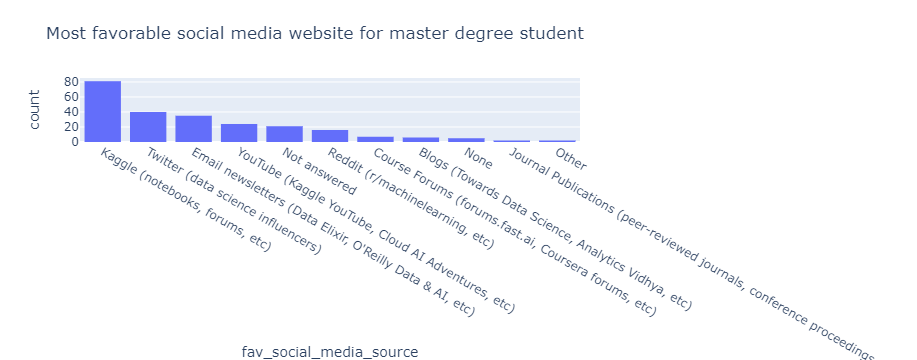

In [49]:
fig = px.histogram(analysis_df,x=analysis_df['fav_social_media_source'],title='Most favorable social media website for master degree student')
fig.update_xaxes(categoryorder='total descending')
fig.show()

Kaggle is the most favorable social media platform for data science followed by Twitter

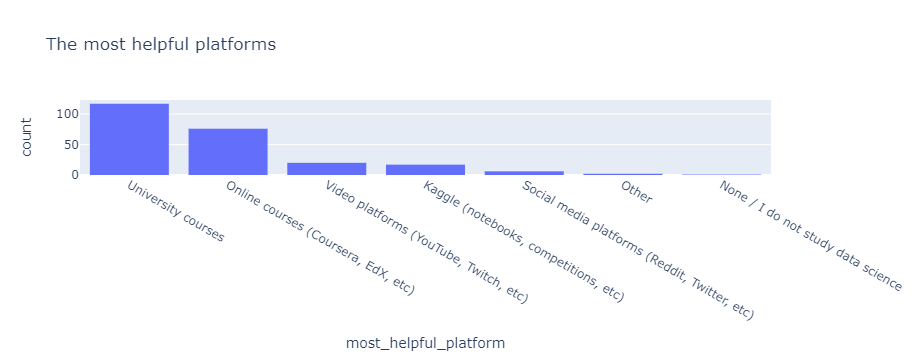

In [50]:
fig = px.histogram(analysis_df,x=analysis_df['most_helpful_platform'],title='The most helpful platforms')
fig.update_xaxes(categoryorder='total descending')
fig.show()

# Conclusion

## I specified specific group to make our analysis in which they are male Students who are in or finished their Master degree and they are juniors in ML methods and uses ML in their research. I was able to explore the following: 

- Students whose Age ranges from 22-24 are the most surveyed followed by students whose age range from 25-29

- Most students in our analysis uses Python as their main programming language

- Kaggle notebooks is the most usable notebook products followed by colab notebooks

- In terms of using ML framework Sikit learn was the most usable frameworks followed by TensorFlow

- Most of juniors students in ML used Linear or logistic regression followed by Descision trees and Random forests

- Most of them agree that University courses are the most helpful platform for learning data science

- Also they agree about the favourite social media which was Kaggle followed by Twitter